# BMME890 - Fall 2019

## Wine Quality Project

Group: Nhan Pham, Khoi Huynh, Frank Wang, and Jiayi Xu

## Problem Overview

- Two datasets of red and white wine.
- Predict the quality of the red and white wine (score from 0 to 10)

## Dataset

- From UCI repository: https://archive.ics.uci.edu/ml/datasets/Wine+Quality
- Size: 4898 samples, 12 features
- Features: 
    - `fixed acidity`
    - `volatile acidity`
    - `citric acid`
    - `residual sugar`
    - `chlorides`
    - `free sulfur dioxide`
    - `total sulfur dioxide`
    - `density`
    - `pH`
    - `sulphates`
    - `alcohol`

## Approach

The problem can be viewed in 2 ways:
- Classification
- Regression

### Classification

- Multilabel classification problem
- Labels: $0 - 10$
- Methods: random forest, SVM

### Regression

- Perform usual regression techniques
- Round the output to its nearest integer
- Methods: linear regression, ridge regression, lasso

In [2]:
import numpy as np
import pandas as pd
import matplotlib 
import seaborn as sns
from matplotlib import pyplot as plt

In [3]:
dataset=pd.read_csv('winequality-white.csv')
dataset.head()
dataset.info()

dataset.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
fixed acidity           4898 non-null float64
volatile acidity        4898 non-null float64
citric acid             4898 non-null float64
residual sugar          4898 non-null float64
chlorides               4898 non-null float64
free sulfur dioxide     4898 non-null float64
total sulfur dioxide    4898 non-null float64
density                 4898 non-null float64
pH                      4898 non-null float64
sulphates               4898 non-null float64
alcohol                 4898 non-null float64
quality                 4898 non-null int64
dtypes: float64(11), int64(1)
memory usage: 459.3 KB


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


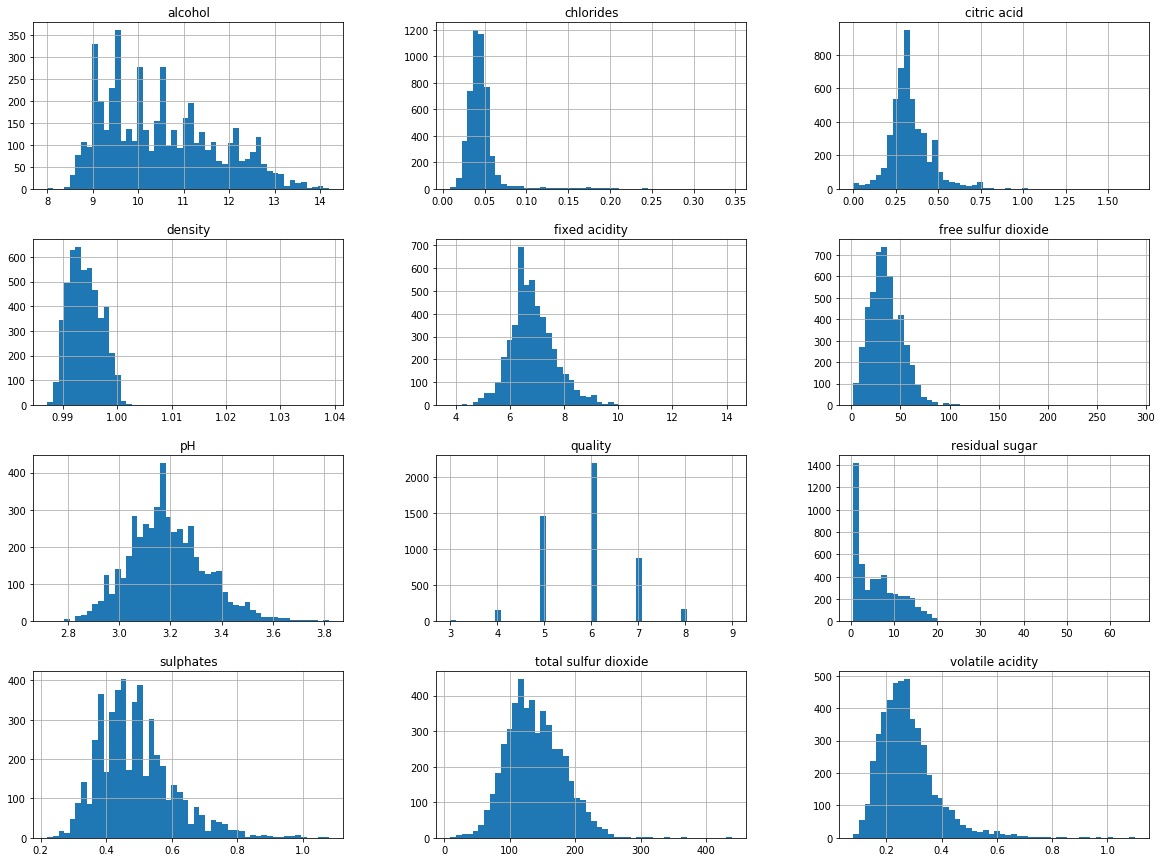

In [4]:
dataset.hist(bins=50, figsize=(20,15))
plt.show()

In [5]:
dataset.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000
mean,6.854788,0.278241,0.334192,6.391415,0.045772,35.308085,138.360657,0.994027,3.188267,0.489847,10.514267,5.877909
std,0.843868,0.100795,0.121020,5.072058,0.021848,17.007137,42.498065,0.002991,0.151001,0.114126,1.230621,0.885639
min,3.800000,0.080000,0.000000,0.600000,0.009000,2.000000,9.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.300000,0.210000,0.270000,1.700000,0.036000,23.000000,108.000000,0.991723,3.090000,0.410000,9.500000,5.000000
50%,6.800000,0.260000,0.320000,5.200000,0.043000,34.000000,134.000000,0.993740,3.180000,0.470000,10.400000,6.000000
75%,7.300000,0.320000,0.390000,9.900000,0.050000,46.000000,167.000000,0.996100,3.280000,0.550000,11.400000,6.000000
max,14.200000,1.100000,1.660000,65.800000,0.346000,289.000000,440.000000,1.038980,3.820000,1.080000,14.200000,9.000000


In [6]:
dataset.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

## Note:

- The data look clean, no capped value, no missing values.
- Too few samples for quality <= 3 and >=9.

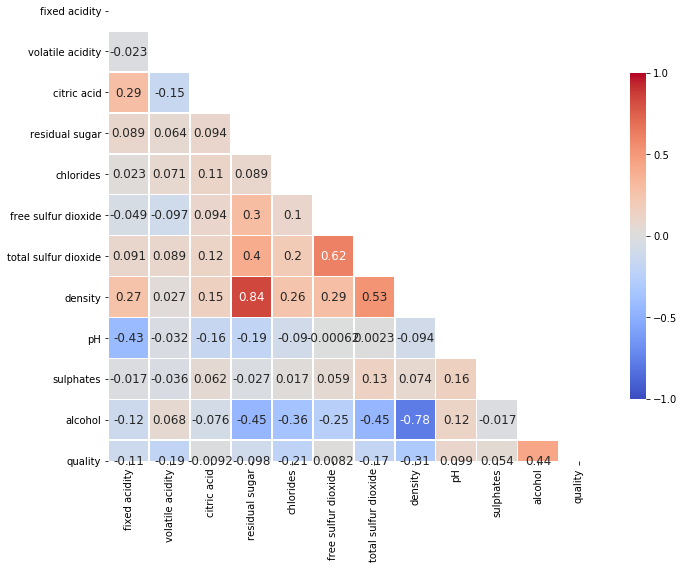

In [7]:
f, ax = plt.subplots(figsize=(11, 15)) 
corr_matrix = dataset.corr()
mask = np.zeros_like(corr_matrix, dtype=np.bool)
mask[np.triu_indices_from(mask)]= True
heatmap = sns.heatmap(corr_matrix, mask = mask, square = True, linewidths = .5, cmap = 'coolwarm',
                      cbar_kws = {'shrink': .4, 
                                'ticks' : [-1, -.5, 0, 0.5, 1]},
                      vmin = -1, 
                      vmax = 1,
                      annot = True,
                      annot_kws = {"size": 12})
#add the column names as labels
ax.set_yticklabels(corr_matrix.columns, rotation = 0)
ax.set_xticklabels(corr_matrix.columns)
sns.set_style({'xtick.bottom': True}, {'ytick.left': True})

![SegmentLocal](figs/DinoSequentialSmaller.gif "segment")

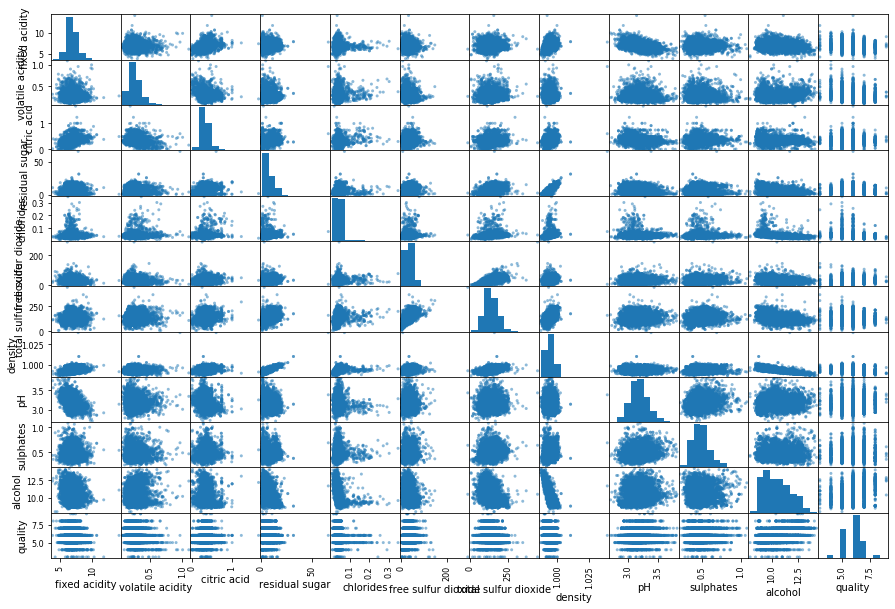

In [8]:
from pandas.plotting import scatter_matrix

_ = scatter_matrix(dataset, figsize=(15, 10))

## Imbalanced label classes

In [9]:
dataset['quality'].value_counts()

6    2198
5    1457
7     880
8     175
4     163
3      20
9       5
Name: quality, dtype: int64

In [10]:
dataset=dataset[dataset.quality !=3]
dataset=dataset[dataset.quality !=9]
dataset=dataset.reset_index(drop=True)
dataset['quality'].value_counts()

6    2198
5    1457
7     880
8     175
4     163
Name: quality, dtype: int64

## Stratified sampling

In [130]:
import sklearn
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)

for train_index, test_index in split.split(dataset, dataset["quality"]):
    strat_train_set = dataset.loc[train_index]
    strat_test_set = dataset.loc[test_index]
    
X_train=pd.DataFrame(strat_train_set[['fixed acidity','volatile acidity','citric acid','residual sugar','chlorides','free sulfur dioxide','total sulfur dioxide','density','pH','sulphates','alcohol']])
X_test=pd.DataFrame(strat_test_set[['fixed acidity','volatile acidity','citric acid','residual sugar','chlorides','free sulfur dioxide','total sulfur dioxide','density','pH','sulphates','alcohol']])

y_train=strat_train_set.quality
y_test=strat_test_set.quality

print(y_train.value_counts())
print(y_test.value_counts())

6    1758
5    1166
7     704
8     140
4     130
Name: quality, dtype: int64
6    440
5    291
7    176
8     35
4     33
Name: quality, dtype: int64


## Naive approach

In [126]:
from sklearn.metrics import precision_score, recall_score, f1_score

# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

#Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', max_depth=10,random_state = 0)
classifier.fit(X_train, y_train)

# Predicting the Test set results
y_pred = classifier.predict(X_test)
# K fold cross validation
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
train_accuracies = accuracy_score(y_train,classifier.predict(X_train))
print('Train set accuracy',train_accuracies)
cm_train = confusion_matrix(y_train, classifier.predict(X_train))
print('******Train set confusion matrix************')
print(cm_train)
# Making the Confusion Matrix
test_accuracies = accuracy_score(y_test,classifier.predict(X_test))
print('\n\nTest set accuracy',test_accuracies)
cm_test = confusion_matrix(y_test, y_pred)
print('******Test set confusion matrix************')
print(cm_test)


Train set accuracy 0.8236098450319052
******Train set confusion matrix************
[[  98   27   21    1    0]
 [   1 1083  224    4    0]
 [   0  153 1782   44    0]
 [   0    6  215  571    0]
 [   0    0   42   36   80]]


Test set accuracy 0.643298969072165
******Test set confusion matrix************
[[  0   8   8   0   0]
 [  0  91  53   1   0]
 [  1  36 170  12   0]
 [  0   0  42  46   0]
 [  0   0   8   4   5]]


## Params grid search

In [14]:
from sklearn.model_selection import GridSearchCV

param_grid = [
    {'n_estimators': [5, 10, 15,20], 'max_features': [1,3,5,10], 'max_depth':[5,10,15],'min_samples_split':[2,5,10],'min_samples_leaf':[1,5,10]},
    {'bootstrap': [False], 'n_estimators': [5, 10, 20], 'max_features': [1,3,5,10],'max_depth':[5,10,15],'min_samples_split':[2,5,10],'min_samples_leaf':[1,5,10]}
  ]

grid_search = GridSearchCV(estimator = classifier,
                           param_grid = param_grid,
                           scoring = 'accuracy',
                           cv = 10,
                           n_jobs = -1)
grid_search = grid_search.fit(X_train, y_train)

print(grid_search.best_params_)

0.6762442278091328
{'bootstrap': False, 'max_depth': 15, 'max_features': 3, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 20}


In [52]:
train_accuracies = accuracy_score(y_train,grid_search.best_estimator_.predict(X_train))
print('Train set accuracy',train_accuracies)
cm_train = confusion_matrix(y_train, grid_search.best_estimator_.predict(X_train))
print('******Train set confusion matrix************')
print(cm_train)
# Making the Confusion Matrix
test_accuracies = accuracy_score(y_test,grid_search.best_estimator_.predict(X_test))
print('\n\nTest set accuracy',test_accuracies)
cm_test = confusion_matrix(y_test, grid_search.best_estimator_.predict(X_test))
print('******Test set confusion matrix************')
print(cm_test)


Train set accuracy 0.9580674567000912
******Train set confusion matrix************
[[ 137    6    4    0    0]
 [   2 1260   50    0    0]
 [   2   38 1917   22    0]
 [   0    3   46  743    0]
 [   0    0    5    6  147]]


Test set accuracy 0.6742268041237114
******Test set confusion matrix************
[[  6   6   3   1   0]
 [  1  94  49   1   0]
 [  2  31 173  13   0]
 [  0   1  37  49   1]
 [  0   1   7   4   5]]


## Features importance

In [103]:
# see them close to their name
feature_importances = grid_search.best_estimator_.feature_importances_
attributes = list(X_train)
sorted(zip(feature_importances, attributes), reverse=True)

[(0.13557591196436045, 'alcohol'),
 (0.10786835872023418, 'density'),
 (0.10499690629626816, 'volatile acidity'),
 (0.0982309411682767, 'free sulfur dioxide'),
 (0.0877082998819876, 'residual sugar'),
 (0.08686579861124065, 'total sulfur dioxide'),
 (0.08296380383905377, 'chlorides'),
 (0.08011458034717087, 'pH'),
 (0.07622438367955067, 'citric acid'),
 (0.06998205612622828, 'sulphates'),
 (0.06946895936562864, 'fixed acidity')]

Keep the 6 most importance features ?

In [56]:
X_train_drop=pd.DataFrame(strat_train_set[['volatile acidity','residual sugar','free sulfur dioxide','total sulfur dioxide','density','alcohol']])
X_test_drop=pd.DataFrame(strat_test_set[['volatile acidity','residual sugar','free sulfur dioxide','total sulfur dioxide','density','alcohol']])



In [61]:
from sklearn.model_selection import GridSearchCV

param_grid = [
    {'n_estimators': [5, 10, 15,20], 'max_features': [1,3,6], 'max_depth':[5,10,15],'min_samples_split':[2,5,10],'min_samples_leaf':[1,5,10]},
    {'bootstrap': [False], 'n_estimators': [5, 10, 20], 'max_features': [1,3,6],'max_depth':[5,10,15],'min_samples_split':[2,5,10],'min_samples_leaf':[1,5,10]}
  ]

grid_search_drop = GridSearchCV(estimator = classifier,
                           param_grid = param_grid,
                           scoring = 'accuracy',
                           cv = 10,
                           n_jobs = -1)
grid_search_drop = grid_search_drop.fit(X_train_drop, y_train)

print(grid_search_drop.best_params_)

0.6639302206259621
{'bootstrap': False, 'max_depth': 15, 'max_features': 1, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 20}


In [62]:
train_accuracies = accuracy_score(y_train,grid_search_drop.best_estimator_.predict(X_train_drop))
print('Train set accuracy',train_accuracies)
cm_train = confusion_matrix(y_train, grid_search_drop.best_estimator_.predict(X_train_drop))
print('******Train set confusion matrix************')
print(cm_train)
# Making the Confusion Matrix
test_accuracies = accuracy_score(y_test,grid_search_drop.best_estimator_.predict(X_test_drop))
print('\n\nTest set accuracy',test_accuracies)
cm_test = confusion_matrix(y_test, grid_search_drop.best_estimator_.predict(X_test_drop))
print('******Test set confusion matrix************')
print(cm_test)


Train set accuracy 0.987172909184197
******Train set confusion matrix************
[[ 128    1    1    0    0]
 [   0 1155   11    0    0]
 [   0    7 1748    3    0]
 [   0    0   11  693    0]
 [   0    0    7    9  124]]


Test set accuracy 0.6533333333333333
******Test set confusion matrix************
[[ 12  16   5   0   0]
 [  1 190  95   5   0]
 [  0  65 343  32   0]
 [  0   9  89  78   0]
 [  0   0  11  10  14]]


## Try PCA

In [131]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train=pd.DataFrame(StandardScaler().fit_transform(X_train), columns=X_train.columns, index=X_train.index)
X_test=pd.DataFrame(StandardScaler().fit_transform(X_test), columns=X_test.columns, index=X_test.index)

In [132]:
from sklearn.decomposition import PCA
pca = PCA(n_components=.95)
principalComponents = pca.fit_transform(X_train)
X_train_PC = pd.DataFrame(data = principalComponents)
X_test_PC = pca.transform(X_test)


In [133]:
X_train_PC.head()

,0,1,2,3,4,5,6,7,8
0,-0.910053,-0.343303,-0.827503,0.316704,-0.023302,0.733540,0.217060,0.330187,-1.042124
1,-0.898946,2.117210,0.544159,-1.537058,0.321523,-0.953273,0.238315,0.173996,1.050635
2,0.166778,-1.459801,0.005087,1.155330,1.375460,0.576159,0.611965,0.372905,0.930712
3,-2.378798,0.163823,0.224456,-0.770752,-0.897109,-0.766884,-0.154888,-0.528238,0.410952
4,-2.525477,1.643357,-1.027254,-0.292886,0.778754,0.269925,0.065529,-0.637326,-0.082690


In [134]:
#Classifier
from sklearn.ensemble import RandomForestClassifier

forest_class = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)

In [136]:
param_grid = [
    {'n_estimators': [5, 10, 20], 'max_features': [2, 4, 9], 'max_depth':[5,10,15],'min_samples_split':[2,5,10],'min_samples_leaf':[1,5,10]},
    {'bootstrap': [False], 'n_estimators': [5, 10, 20], 'max_features': [2, 4,9],'min_samples_split':[2,5,10],'max_depth':[5,10,15],'min_samples_leaf':[1,5,10]}
  ]

grid_search_PC = GridSearchCV(forest_class, param_grid, cv=5,
                           scoring='neg_mean_squared_error',
                           return_train_score=True,error_score=np.nan,n_jobs = -1)
grid_search_PC.fit(X_train_PC, y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='entropy',
                                              max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=10, n_jobs=None,
                                              oob_score=False, random_state=...
             param_grid=[{'max_depth': [5, 10, 15], 'max_features': [2, 4, 9],
                          'min_s

In [137]:
train_accuracies = accuracy_score(y_train,grid_search_PC.best_estimator_.predict(X_train_PC))
print('Train set accuracy',train_accuracies)
cm_train = confusion_matrix(y_train, grid_search_PC.best_estimator_.predict(X_train_PC))
print('******Train set confusion matrix************')
print(cm_train)
# Making the Confusion Matrix
test_accuracies = accuracy_score(y_test,grid_search_PC.best_estimator_.predict(X_test_PC))
print('\n\nTest set accuracy',test_accuracies)
cm_test = confusion_matrix(y_test, grid_search_PC.best_estimator_.predict(X_test_PC))
print('******Test set confusion matrix************')
print(cm_test)


Train set accuracy 0.9733196511031298
******Train set confusion matrix************
[[ 117    6    6    1    0]
 [   0 1143   20    3    0]
 [   0   18 1738    2    0]
 [   0    1   26  677    0]
 [   0    0   10   11  119]]


Test set accuracy 0.5907692307692308
******Test set confusion matrix************
[[  3  18  12   0   0]
 [  1 166 120   4   0]
 [  1  77 330  31   1]
 [  0   5  96  72   3]
 [  0   1  17  12   5]]


## Try Feature Selection + Random Forest

### Try $\ell_1$ penalty

In [96]:
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import SelectFromModel
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier

clf = Pipeline([
  ('feature_selection', SelectFromModel(LinearSVC(C=0.01, penalty="l1", dual=False,max_iter=5000))),
  ('classification', RandomForestClassifier(n_estimators=20))
])
clf.fit(X_train, y_train)

Pipeline(memory=None,
         steps=[('feature_selection',
                 SelectFromModel(estimator=LinearSVC(C=0.01, class_weight=None,
                                                     dual=False,
                                                     fit_intercept=True,
                                                     intercept_scaling=1,
                                                     loss='squared_hinge',
                                                     max_iter=5000,
                                                     multi_class='ovr',
                                                     penalty='l1',
                                                     random_state=None,
                                                     tol=0.0001, verbose=0),
                                 max_features=None, norm_order=1, prefit=False,
                                 threshold=None)),
                ('classification',
                 RandomForestClassifier(bootstrap=T

In [97]:
train_accuracies = accuracy_score(y_train, clf.predict(X_train))
print('Train set accuracy',train_accuracies)
cm_train = confusion_matrix(y_train, clf.predict(X_train))
print('******Train set confusion matrix************')
print(cm_train)
# Making the Confusion Matrix
test_accuracies = accuracy_score(y_test, clf.predict(X_test))
print('\n\nTest set accuracy',test_accuracies)
cm_test = confusion_matrix(y_test, clf.predict(X_test))
print('******Test set confusion matrix************')
print(cm_test)

Train set accuracy 0.9979489516864175
******Train set confusion matrix************
[[ 146    0    1    0    0]
 [   0 1311    1    0    0]
 [   0    4 1975    0    0]
 [   0    1    0  791    0]
 [   0    0    0    2  156]]


Test set accuracy 0.7257731958762886
******Test set confusion matrix************
[[  7   5   4   0   0]
 [  2 106  35   2   0]
 [  0  28 182   9   0]
 [  0   1  38  49   0]
 [  0   1   7   1   8]]


### Try $\ell_2$ penalty

In [98]:
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import SelectFromModel
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier

clf = Pipeline([
  ('feature_selection', SelectFromModel(LinearSVC(C=0.01, penalty="l2", dual=False,max_iter=5000))),
  ('classification', RandomForestClassifier(n_estimators=20))
])
clf.fit(X_train, y_train)

Pipeline(memory=None,
         steps=[('feature_selection',
                 SelectFromModel(estimator=LinearSVC(C=0.01, class_weight=None,
                                                     dual=False,
                                                     fit_intercept=True,
                                                     intercept_scaling=1,
                                                     loss='squared_hinge',
                                                     max_iter=5000,
                                                     multi_class='ovr',
                                                     penalty='l2',
                                                     random_state=None,
                                                     tol=0.0001, verbose=0),
                                 max_features=None, norm_order=1, prefit=False,
                                 threshold=None)),
                ('classification',
                 RandomForestClassifier(bootstrap=T

In [99]:
train_accuracies = accuracy_score(y_train, clf.predict(X_train))
print('Train set accuracy',train_accuracies)
cm_train = confusion_matrix(y_train, clf.predict(X_train))
print('******Train set confusion matrix************')
print(cm_train)
# Making the Confusion Matrix
test_accuracies = accuracy_score(y_test, clf.predict(X_test))
print('\n\nTest set accuracy',test_accuracies)
cm_test = confusion_matrix(y_test, clf.predict(X_test))
print('******Test set confusion matrix************')
print(cm_test)

Train set accuracy 0.9972652689152234
******Train set confusion matrix************
[[ 146    0    1    0    0]
 [   0 1311    1    0    0]
 [   0    3 1974    2    0]
 [   0    0    3  789    0]
 [   0    0    1    1  156]]


Test set accuracy 0.6721649484536083
******Test set confusion matrix************
[[  3   6   7   0   0]
 [  0 102  41   2   0]
 [  1  29 169  19   1]
 [  0   4  38  45   1]
 [  0   1   5   4   7]]


## Combine with K-Fold cross validation

In [74]:
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import SelectFromModel
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier

clf = Pipeline([
  ('feature_selection', SelectFromModel(LinearSVC(C=0.01, penalty="l1", dual=False,max_iter=5000))),
  ('classification', RandomForestClassifier(n_estimators=20))
])

kf = StratifiedKFold(n_splits=10, random_state=42, shuffle=True)

y_fold = dataset.quality
X_fold = dataset.drop(columns=['quality']).copy()

In [75]:
train_confusion_list = []
test_confusion_list = []
train_accuracy_list = []
test_accuracy_list = []

for train_index, test_index in kf.split(X_fold,y_fold):
    X_train_fold, X_test_fold = X_fold.iloc[train_index], X_fold.iloc[test_index]
    y_train_fold, y_test_fold = y_fold.iloc[train_index], y_fold.iloc[test_index]
    
    clf.fit(X_train_fold, y_train_fold)
  
    y_train_pred_fold = clf.predict(X_train_fold)
    y_pred_fold = clf.predict(X_test_fold)
    
    train_confusion_list.append(confusion_matrix(y_train_fold, y_train_pred_fold))
    
    train_accuracy_list.append(accuracy_score(y_train_fold,y_train_pred_fold))
    
    test_confusion_list.append(confusion_matrix(y_test_fold, y_pred_fold))
    
    test_accuracy_list.append(accuracy_score(y_test_fold,y_pred_fold))

In [77]:
print("Average train accuracy:", np.mean(train_accuracy_list))
print("Average test accuracy:", np.mean(test_accuracy_list))

Average train accuracy: 0.9976286471180009
Average test accuracy: 0.6786104069921497


## Summary about Classification

| Methods                               | Data Preprocessing             | Train Accuracy | Test Accuracy | Comments       |
|---------------------------------------|--------------------------------|----------------|---------------|----------------|
| Naive: RF                             | None                           | 0.824          | 0.643         |                |
| RF + Grid Search                      | None                           | 0.958          | 0.674         |                |
| Feature Importance + RF + Grid Search | Keep 6 most important features | 0.987          | 0.653         |                |
| PCA + Grid Search + RF                | PCA, 95% variance              | 0.973          | 0.591         |                |
| Feature Selection + RF                | None                           | 0.995          | 0.653         |                |
| Feature Selection + RF                | None                           | 0.998          | 0.679         | with K-fold CV |

## Linear Regression

In [82]:
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score

# Create linear regression object
linreg = linear_model.LinearRegression()

# Train the model using the training sets
linreg.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [84]:
from sklearn.metrics import accuracy_score

y_train_pred = np.round(linreg.predict(X_train),0)
y_test_pred = np.round(linreg.predict(X_test),0)

train_accuracies = accuracy_score(y_train, y_train_pred)
print('Train set accuracy',train_accuracies)
cm_train = confusion_matrix(y_train, y_train_pred)
print('******Train set confusion matrix************')
print(cm_train)
# Making the Confusion Matrix
test_accuracies = accuracy_score(y_test, y_test_pred)
print('\n\nTest set accuracy',test_accuracies)
cm_test = confusion_matrix(y_test, clf.predict(X_test))
print('******Test set confusion matrix************')
print(cm_test)

Train set accuracy 0.5211941659070192
******Train set confusion matrix************
[[   0    0    0    0    0    0]
 [   0    5   79   62    1    0]
 [   0    1  528  771   12    0]
 [   1    0  246 1560  172    0]
 [   0    0   27  571  194    0]
 [   0    0    1  100   57    0]]


Test set accuracy 0.5154639175257731
******Test set confusion matrix************
[[  5   7   4   0   0]
 [  2 105  35   2   1]
 [  0  34 174  10   1]
 [  0   3  42  41   2]
 [  0   0   6   3   8]]


## Ridge Regression

In [85]:
from sklearn.linear_model import RidgeCV
from sklearn.metrics import mean_squared_error, r2_score

# Create linear regression object
rreg = linear_model.RidgeCV(alphas=[1e-3,1e-2,1e-1,1])

# Train the model using the training sets
rreg.fit(X_train, y_train)

RidgeCV(alphas=array([0.001, 0.01 , 0.1  , 1.   ]), cv=None, fit_intercept=True,
        gcv_mode=None, normalize=False, scoring=None, store_cv_values=False)

In [86]:
from sklearn.metrics import accuracy_score

y_train_pred = np.round(rreg.predict(X_train),0)
y_test_pred = np.round(rreg.predict(X_test),0)

train_accuracies = accuracy_score(y_train, y_train_pred)
print('Train set accuracy',train_accuracies)
cm_train = confusion_matrix(y_train, y_train_pred)
print('******Train set confusion matrix************')
print(cm_train)
# Making the Confusion Matrix
test_accuracies = accuracy_score(y_test, y_test_pred)
print('\n\nTest set accuracy',test_accuracies)
cm_test = confusion_matrix(y_test, clf.predict(X_test))
print('******Test set confusion matrix************')
print(cm_test)

Train set accuracy 0.5166362807657247
******Train set confusion matrix************
[[   5   75   66    1    0]
 [   2  524  773   13    0]
 [   1  249 1554  175    0]
 [   0   26  582  184    0]
 [   0    1  100   57    0]]


Test set accuracy 0.5278350515463918
******Test set confusion matrix************
[[  5   7   4   0   0]
 [  2 105  35   2   1]
 [  0  34 174  10   1]
 [  0   3  42  41   2]
 [  0   0   6   3   8]]


## Summary

| Methods                               | Data Preprocessing             | Train Accuracy | Test Accuracy | Comments       |
|---------------------------------------|--------------------------------|----------------|---------------|----------------|
| Naive: RF                             | None                           | 0.824          | 0.643         |                |
| RF + Grid Search                      | None                           | 0.958          | 0.674         |                |
| Feature Importance + RF + Grid Search | Keep 6 most important features | 0.987          | 0.653         |                |
| PCA + Grid Search + RF                | PCA, 95% variance              | 0.973          | 0.591         |                |
| Feature Selection + RF                | None                           | 0.995          | 0.653         |                |
| Feature Selection + RF                | None                           | 0.998          | 0.679         | with K-fold CV |
| Linear Regression                     | None                           | 0.521          | 0.515         |                |
| Ridge Regression                      | None                           | 0.517          | 0.528         |                |